<a href="https://colab.research.google.com/github/omkarwazulkar/ComputerVisionProjects/blob/main/Facenet_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 4.1 MB/s 


In [2]:
# MTCNN stands for Multi-Task Cascaded Convolutional Neural Network
import mtcnn
print(mtcnn.__version__)

0.1.0


In [3]:
# Loading Facenet Model from Internet
from keras.models import load_model

In [4]:
# Loading Model
model = load_model('/content/drive/MyDrive/KerasFacenet/model/facenet_keras.h5')

In [5]:
# Summarizing Models
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [6]:
from PIL import Image
from mtcnn.mtcnn import MTCNN
from numpy import asarray

In [17]:
from matplotlib import pyplot
from os import listdir
from os.path import isdir
from numpy import savez_compressed


In [19]:
from numpy import expand_dims

In [9]:
# Extract Face Function
def extract_face(filename, required_size = (160, 160)):

  # Loading Image, converting to RGB and then to Pixels
  image = Image.open(filename)
  image = image.convert('RGB')
  pixels = asarray(image)

  # Using MTCNN Detector to detect faces
  detector = MTCNN()
  results = detector.detect_faces(pixels)

  # Resizing Pixels
  x1, y1, width, height = results[0]['box']
  x1, y1 = abs(x1), abs(y1)
  x2, y2 = x1 + width, y1 + height
  face = pixels[y1:y2, x1:x2]

  image = Image.fromarray(face)
  image = image.resize((160, 160))
  face_array = asarray(image)
  return face_array

1 (160, 160, 3)


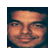

In [11]:
# Calling Extract Face with an Image
face = extract_face('/content/Omkar.jpeg')
print(1, face.shape)
pyplot.subplot(2, 7, 1)
pyplot.axis('off')
pyplot.imshow(face)

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


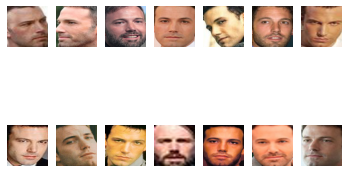

In [10]:
# Detecting Faces
folder = '/content/drive/MyDrive/Faces/data/train/ben_afflek/'
i = 1
for filename in listdir(folder):
  path = folder + filename
  face = extract_face(path)
  print(i, face.shape)
  pyplot.subplot(2, 7, i)
  pyplot.axis('off')
  pyplot.imshow(face)
  i += 1
pyplot.show()

In [12]:
# Loading and Detecting All Faces from a Directory
def load_faces(directory):
  faces = list()
  for filename in listdir(directory):
    path = directory + filename
    face = extract_face(path)
    faces.append(face)
    return faces

In [13]:
# Loading Images Dataset
def load_dataset(directory):
  X, y = list(), list()
  # enumerate folders, on per class
  for subdir in listdir(directory):
    path = directory + subdir + '/'
    if not isdir(path):
      continue
    faces = load_faces(path)
    labels = [subdir for _ in range(len(faces))]
    print('>loaded %d examples for class: %s' % (len(faces), subdir))
    X.extend(faces)
    y.extend(labels)
  return asarray(X), asarray(y)

In [22]:
# Saving the Dataset in FacesDataset.npz file
trainX, trainy = load_dataset('/content/drive/MyDrive/Faces/data/train/')
print(trainX.shape, trainy.shape)
testX, testy = load_dataset('/content/drive/MyDrive/Faces/data/val/')
print(testX.shape, testy.shape)
savez_compressed('FacesDataset.npz', trainX, trainy, testX, testy)

>loaded 1 examples for class: ben_afflek
>loaded 1 examples for class: madonna
>loaded 1 examples for class: elton_john
>loaded 1 examples for class: mindy_kaling
>loaded 1 examples for class: jerry_seinfeld
(5, 160, 160, 3) (5,)
>loaded 1 examples for class: ben_afflek
>loaded 1 examples for class: madonna
>loaded 1 examples for class: elton_john
>loaded 1 examples for class: jerry_seinfeld
>loaded 1 examples for class: mindy_kaling
(5, 160, 160, 3) (5,)


In [21]:
# Embedding
def get_embedding(model, face_pixels):
  face_pixels = face_pixels.astype('float32')
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
  samples = expand_dims(face_pixels, axis=0)
  yhat = model.predict(samples)
  return yhat[0]

In [23]:
from numpy import load

In [24]:
# Loading Dataset
data = load('/content/FacesDataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (5, 160, 160, 3) (5,) (5, 160, 160, 3) (5,)


In [25]:
# Loading Facenet Model
model = load_model('/content/drive/MyDrive/KerasFacenet/model/facenet_keras.h5')
print('Loaded Model')

Loaded Model


In [26]:
# Converting Train Face to Embedding
newTrainX = list()
for face_pixels in trainX:
  embedding = get_embedding(model, face_pixels)
  newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

(5, 128)


In [27]:
# Converting Test Face to Embedding
newTestX = list()
for face_pixels in testX:
  embedding = get_embedding(model, face_pixels)
  newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)

(5, 128)


In [28]:
# Save Array in Compressed Format
savez_compressed('CelebrityFaceEmbedding.npz', newTrainX, trainy, newTestX, testy)

# **Developing a Classifier for the 5 Celebrity Faces Dataset**

In [29]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

In [30]:
# Loading Faces
data = load('FacesDataset.npz')
testX_faces = data['arr_2']

In [31]:
# Laoding Face Embedding
data = load('CelebrityFaceEmbedding.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

In [32]:
# Normalizing Vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

In [33]:
# Encoding Target
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [34]:
# Fitting SVC Model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

SVC(kernel='linear', probability=True)

In [35]:
# Testing Model
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# **Predicting on Image**

In [36]:
# Prediction
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

In [37]:
# Confirming Name
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s ' % (predict_names[0]))
print('Expected: %s' % random_face_name[0])

Predicted: elton_john 
Expected: elton_john


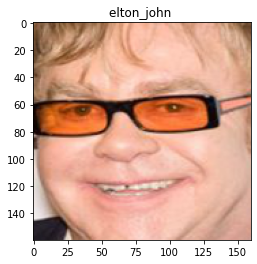

In [38]:
# Plotting Image
pyplot.imshow(random_face_pixels)
title = '%s ' % (predict_names[0])
pyplot.title(title)
pyplot.show()